In [6]:
#https://school.stockcharts.com/doku.php?id=technical_indicators:pivot_points
from mplfinance.original_flavor import candlestick_ohlc
import datetime as dt
import pandas as pd
import numpy as np
from pandas_datareader import data
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

In [7]:
start='2014-1-1'
end='2016-3-31'
period = 23 #(days)
ohlc_resample = '5D'

df = data.DataReader('AAPL', 'yahoo', start, end)
df2 = df

for i in range(period):
    df = df.append(pd.Series(), ignore_index=True)
    

df['pivot_point'] = ( df['High'].shift(period).rolling(window=period).max() + df['Low'].shift(period).rolling(window=period).min() + df['Close'].shift(period) ) /3
df['s1'] = df['pivot_point'] * 2 - df['High'].shift(period).rolling(window=period).max()
df['s2'] = df['pivot_point'] - ( df['High'].shift(period).rolling(window=period).max() - df['Low'].shift(period).rolling(window=period).min() )
df['s3'] = df['Low'].shift(period).rolling(window=period).min() - 2 * (df['High'].shift(period).rolling(window=period).max() - df['pivot_point'])
df['r1'] = df['pivot_point'] * 2 - df['Low'].shift(period).rolling(window=period).min()
df['r2'] = df['pivot_point'] + ( df['High'].shift(period).rolling(window=period).max() - df['Low'].shift(period).rolling(window=period).min() )
df['r3'] = df['High'].shift(period).rolling(window=period).max() + 2 * (df['pivot_point'] - df['Low'].shift(period).rolling(window=period).min())


for i in range(len(df['Close'])):
    n = i+1
    if n%period != 0:
        df['pivot_point'][i] = np.nan
        df['s1'][i] = np.nan
        df['s2'][i] = np.nan
        df['s3'][i] = np.nan
        df['r1'][i] = np.nan
        df['r2'][i] = np.nan
        df['r3'][i] = np.nan
        
df['pivot_point'] = df['pivot_point'].shift(1 - period)
df['s1'] = df['s1'].shift(1 - period)
df['s2'] = df['s2'].shift(1 - period)
df['s3'] = df['s3'].shift(1 - period)
df['r1'] = df['r1'].shift(1 - period)
df['r2'] = df['r2'].shift(1 - period)
df['r3'] = df['r3'].shift(1 - period)

df = df[:-period]
df = df.set_index(df2.index)

C:\Users\s2007\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


In [11]:
new_df = pd.DataFrame(df)
new_df.dropna(inplace=True)
new_df = new_df.append(df2.iloc[len(df.index) - 1])

In [12]:
df_ohlc = df2.resample(ohlc_resample).ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(date2num)

<IPython.core.display.Javascript object>


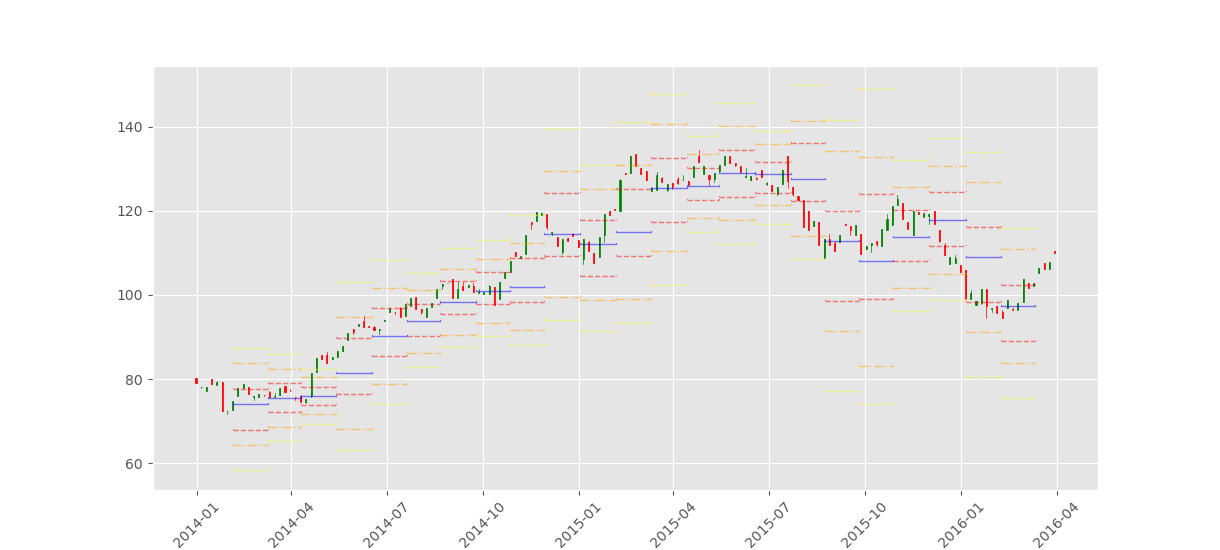

In [13]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(12.2,5.5))
plt.xticks(rotation=45)
candlestick_ohlc(ax, df_ohlc.values, width=1, colorup='g')
for i in range( len(new_df.index) - 1 ):
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['pivot_point'][i], new_df['pivot_point'][i]], linestyle="-", lw=1, marker=",", color='blue', alpha = 0.5)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['s1'][i], new_df['s1'][i]], linestyle="--", lw=1, marker=",", color='red', alpha = 0.5)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                  [new_df['s2'][i], new_df['s2'][i]], linestyle="-.", lw=1, marker=",", color='orange', alpha = 0.5)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['r1'][i], new_df['r1'][i]], linestyle="--", lw=1, marker=",", color='red', alpha = 0.5)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['r2'][i], new_df['r2'][i]], linestyle="-.", lw=1, marker=",", color='orange', alpha = 0.5)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['s3'][i], new_df['s3'][i]], linestyle=":", lw=1, marker=",", color='yellow', alpha = 0.8)
    plt.plot_date([new_df.index[i], new_df.index[i+1]], 
                 [new_df['r3'][i], new_df['r3'][i]], linestyle=":", lw=1, marker=",", color='yellow', alpha = 0.8)

    
plt.show()